In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create data drame to read data set
df = pd.read_csv('D:/50_Startups.csv')

In [3]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
# check the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# describe df numerical columns
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Data Description



This dataset has data collected from New York, California and Florida about 50 business Startups. The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

# Exploratory Data Analysis¶


Find Unwanted Columns

Find Missing Values

Find Features with one value

Explore the Categorical Features

Find Categorical Feature Distribution

Relationship between Categorical Features and Label

Explore the Numerical Features

Find Discrete Numerical Features

Relation between Discrete numerical Features and Labels

Find Continous Numerical Features

Distribution of Continous Numerical Features

Relation between Continous numerical Features and Labels

Find Outliers in numerical features

Explore the Correlation between numerical features

1. Find unwanted columns

there is no unwanted column present in given dataset to remove

2. Find Missing Values



In [7]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


3. Find Features with one value

In [8]:
for column in df.columns:
    print(column,df[column].nunique())

R&D Spend 49
Administration 50
Marketing Spend 48
State 3
Profit 50


no feature found with one value


4. Explore the Categorical Features

In [9]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features


['State']

In [10]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is State and number of categories are 3


only one feature that is State is categorical and it has 3 unique values

5. Find Categorical Feature Distribution

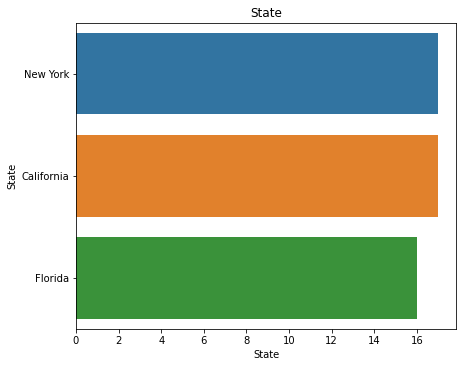

In [11]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()


State with florida has less number of records in given dataset

6. Relationship between Categorical Features and Label



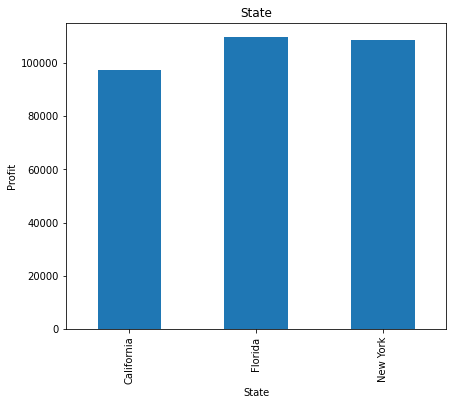

In [12]:
#Find out the relationship between categorical variable and dependent varaible
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for feature in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    data=df.copy()
    data.groupby(feature)['Profit'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plotnumber+=1
plt.show()

It seems startup in state of California has less profits than others two states

8. Explore the Numerical Features



In [13]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Profit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  3


,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


there are three numerical features that are R&D Spend, Administration and Marketing Spend



9. Find Discrete Numerical Features

In [14]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


10. Find Continous Numerical Features



In [15]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['Profit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 3


In [16]:
continuous_features


['R&D Spend', 'Administration', 'Marketing Spend']

there are three continous numerical features..'R&D Spend', 'Administration', 'Marketing Spend'

11. Distribution of Continous Numerical Features



C:\Users\Zaid Rehman\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zaid Rehman\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zaid Rehman\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

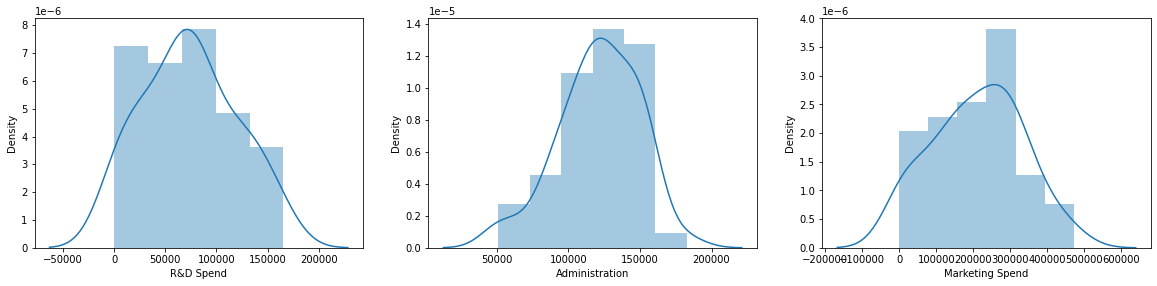

In [17]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

it seems all continuous features are normally distributed


12. Relation between Continous numerical Features and Labels



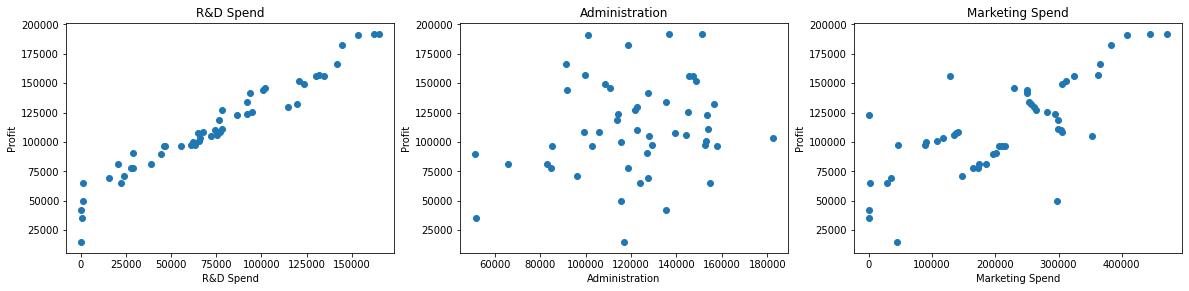

In [18]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['Profit'])
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plotnumber+=1
plt.show()

it seems R&D Spend, Marketing Spend feature linearly progressing with Profit


13. Find Outliers in numerical features

C:\Users\Zaid Rehman\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Zaid Rehman\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Zaid Rehman\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


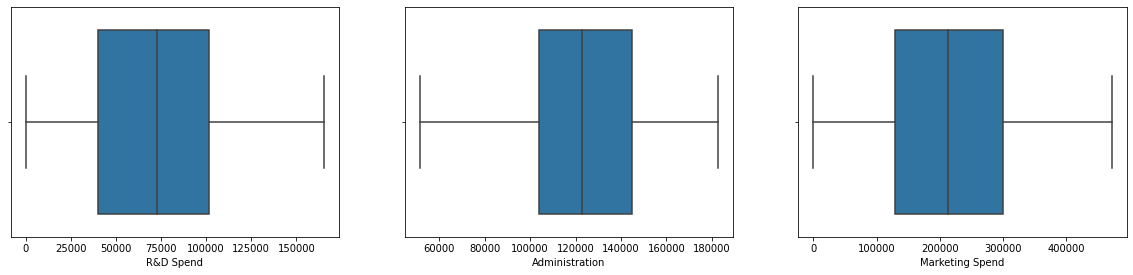

In [19]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

it seems no outliers found

14. Explore the Correlation between numerical features



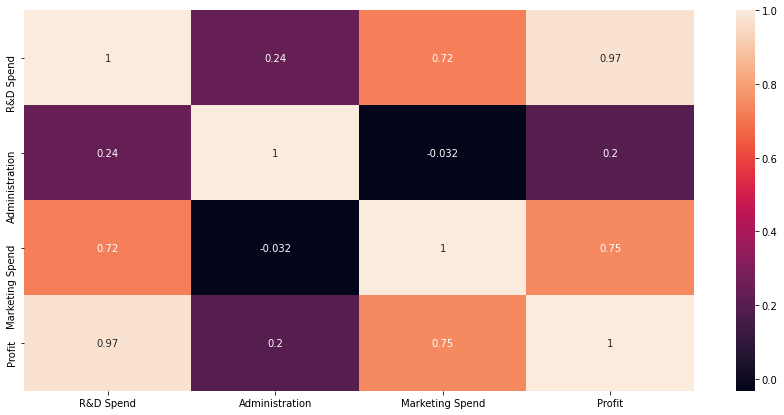

In [20]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

it seems no feature is heavily correlated with other features


End of Exploratory Data Analysis

# Feature Engineering

Drop unwanted Features

Handle Missing Values

Handle Categorical Features

Handle Feature Scalling

Remove Outliers

As per Exploratory Data Analysis EDA,

there is no unwanted column present in given dataset to remove

no missing value found

only one feature that is State is categorical and it has 3 unique values

it seems no outliers found

In [21]:
# Handle Categorical Features
state_dummies = pd.get_dummies(df['State'],prefix='state',drop_first=True)
df = pd.concat([df,state_dummies],axis=1)

In [22]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit,state_Florida,state_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [23]:

df.drop(['State'], axis=1, inplace=True)

In [24]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,state_Florida,state_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


# Split Dataset into Training set and Test set


In [25]:
X = df.drop(['Profit'],axis=1)
y = df['Profit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Model Selection

In [26]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [27]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [28]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.922076,"{'copy_X': True, 'fit_intercept': True, 'normalize': True}"
1,lasso,0.922115,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.886502,"{'criterion': 'mse', 'splitter': 'best'}"


# Model Building

In [29]:
model_lr = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

In [30]:

model_lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [31]:
model_lr.score(X_test,y_test)

0.9347068473282423

In [32]:

y_pred= model_lr.predict(X_test)

y_pred



array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [33]:

y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [34]:
X.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'state_Florida',
       'state_New York'],
      dtype='object')

In [35]:
np.where(X.columns=='state_'+str('New York'))[0][0]

4

In [36]:
def predict_profit(r_d_expenses,administration_expenses,marketing_expenses,state):    
    state_index = np.where(X.columns=='state_'+str(state))[0][0]

    x = np.zeros(len(X.columns))
    x[0] = r_d_expenses
    x[1] = administration_expenses
    x[2] = marketing_expenses
    if state_index >= 0:
        x[state_index] = 1

    return model_lr.predict([x])[0]

In [37]:

predict_profit(55493.95,103057.49,214634.81,'New York')

97423.07641753659

# Save Model


In [38]:

import pickle
pickle.dump(model_lr,open('profit_prediction_model.pkl','wb'))


In [39]:
#save the data columns
import json

columns = {'data_columns' : [col.lower() for col in X.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))